In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline
import pickle

In [3]:
# read data from NY times
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv")

In [4]:
# engineer new cases
df['new_cases'] = df.cases - df.cases.shift().fillna(0)

In [5]:
df.head()

,date,cases,deaths,new_cases
0,2020-01-21,1,0,1.0
1,2020-01-22,1,0,0.0
2,2020-01-23,1,0,0.0
3,2020-01-24,2,0,1.0
4,2020-01-25,3,0,1.0


In [6]:
# create pandas time series
df.date = pd.to_datetime(df.date)
df.set_index('date',inplace=True)
df['rolling_weekly_avg'] = df.new_cases.rolling(window=7).mean().fillna(0)

In [7]:
# create timeseries readable by fbprophet
ts = pd.DataFrame({'ds':df.index,'y':df.new_cases})
#ts['cap'] = 30000 # unused in linear growth
#ts['floor'] = 0 # unused in linear growth
ts.head()

,ds,y
date,,
2020-01-21,2020-01-21,1.0
2020-01-22,2020-01-22,0.0
2020-01-23,2020-01-23,0.0
2020-01-24,2020-01-24,1.0
2020-01-25,2020-01-25,1.0


In [8]:
from fbprophet import Prophet


In [9]:
# instantiate the model and fit the timeseries
prophet = Prophet()
prophet.fit(ts)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
future = prophet.make_future_dataframe(periods=25)
forecast = prophet.predict(future)

In [11]:
# display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-21,-9103.078870,-58640.323079,41712.545522
1,2020-01-22,-5907.349397,-55090.396284,39719.585397
2,2020-01-23,-3486.078348,-50370.728178,46471.504828
3,2020-01-24,291.271816,-49209.570446,46650.450015
4,2020-01-25,-18815.132159,-71597.469367,31219.972632


In [13]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
638,2021-10-20,160104.981843,109504.238529,208091.855351
639,2021-10-21,163039.907499,112199.049691,211031.436356
640,2021-10-22,167330.912270,115687.838255,215223.119362
641,2021-10-23,148738.162903,101651.202140,195728.648635
642,2021-10-24,136325.637589,86264.534445,184156.269681


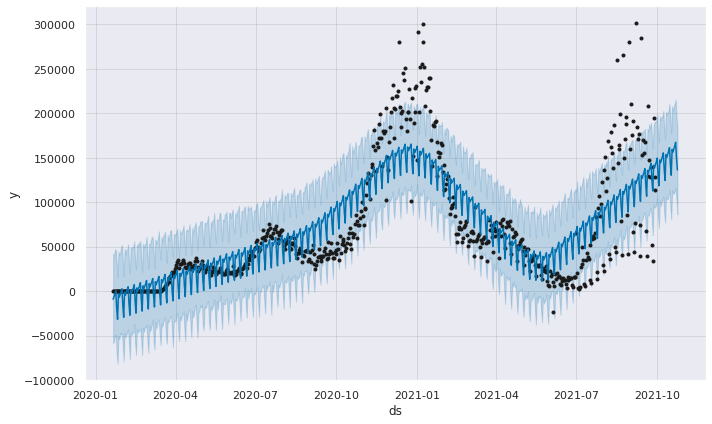

In [12]:
# plot
fig = prophet.plot(forecast)

In [14]:
prophet = Prophet(weekly_seasonality=False, changepoint_range=1,changepoint_prior_scale=0.75)
prophet.fit(ts)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
# create a future data frame 
future = prophet.make_future_dataframe(periods=25)
forecast = prophet.predict(future)

In [16]:
# display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-21,-6828.448579,-42319.589318,27641.868623
1,2020-01-22,-6493.035349,-42182.244107,28213.454661
2,2020-01-23,-6157.622119,-37560.117918,28392.156682
3,2020-01-24,-5822.208889,-38795.959524,26755.105815
4,2020-01-25,-5486.795659,-37858.272549,28894.089501


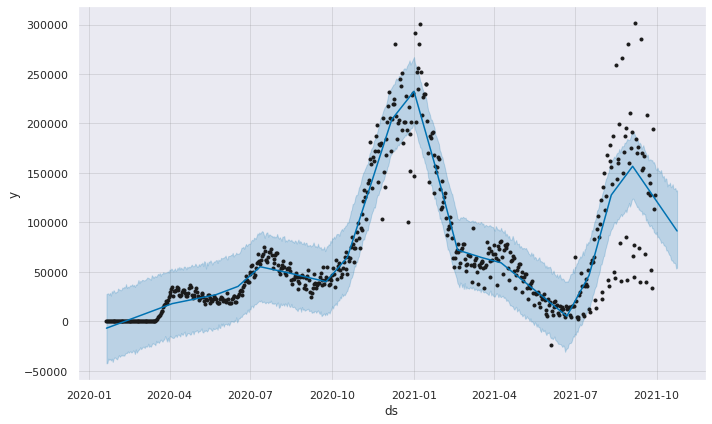

In [17]:
# plot
fig = prophet.plot(forecast)